In [1]:
import mealpy
print(mealpy.__version__)

2.5.4


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import mealpy

In [3]:

estimator = LinearRegression()
rfecv = RFECV(estimator, cv = 8)
data_training = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\datasets\\archive\\train.csv")
act = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
data_training["Activity"].replace(act, list(range(1,7)), inplace= True)

y = data_training["Activity"]
data_training = data_training.drop("Activity", axis=1)
columns = data_training.columns
data_training = pd.DataFrame(data_training, columns= columns)

from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
data_ = scaler.fit_transform(data_training)
data_ = pd.DataFrame(data_, columns= data_training.columns)
data_training = data_


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21468\3868755890.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_training["Activity"].replace(act, list(range(1,7)), inplace= True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21468\3868755890.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

In [19]:
#feature selection using principle component analysis

from sklearn.decomposition import PCA

def net_var(data):
    pca = PCA()
    pca.fit(data)

    #plot the explained variance ratio

    plt.plot( np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explianed Variance')
    plt.title('Cummulative Explained Variance graph')
    plt.show()

def scree_plot(data, k=None):
  pca = PCA()
  pca.fit(data)
  plt.figure(figsize=(10,5))
  plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_*100)
  plt.xlabel("principal components")
  plt.ylabel('variance explained')
  plt.title('Scree plot')

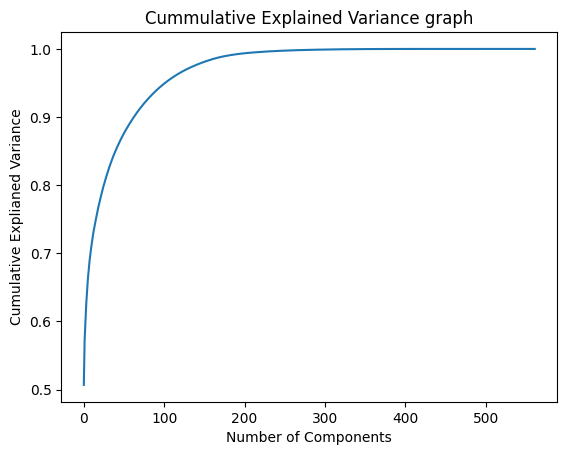

'This curve quantifies how much of the total, 562-dimensional variance is contained within the first N\n components. from the graph we can see that approximately 200 principal components are capable of accounting for 99% of the total varaince'

In [20]:

net_var(data_training)

"""This curve quantifies how much of the total, 562-dimensional variance is contained within the first N
 components. from the graph we can see that approximately 200 principal components are capable of accounting for 99% of the total varaince"""

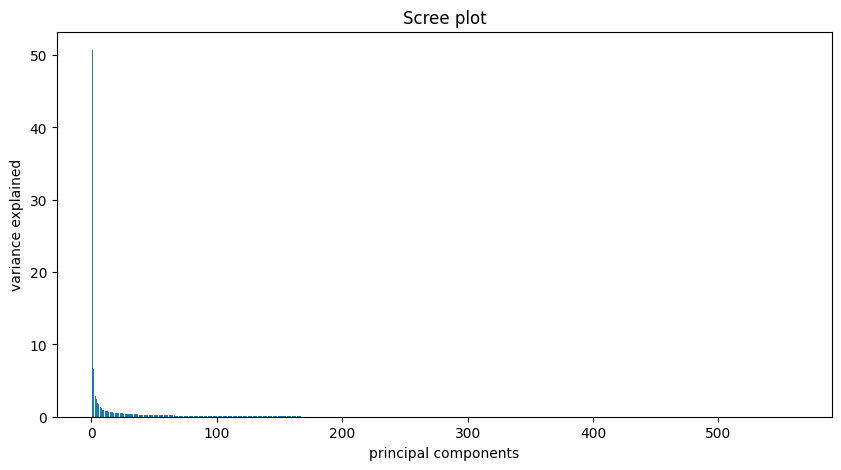

In [21]:
scree_plot(data_training)




In [22]:
#from the scree plot we can see that about 180 features contribute to the cummulative explained variance, let's verify

U, Sigma, Vt = np.linalg.svd(data_training.cov())
sum_first_k = np.sum(Sigma[:180])
sum_all = np.sum(Sigma)

retained_variance = sum_first_k/sum_all
print(retained_variance)

0.9902262765991686


In [23]:
pca = PCA(n_components = 180)
data_pca = pca.fit_transform(data_training)
data_pca = pd.DataFrame(data_pca)
data_pca.columns = [f'PC{i}' for i in range(1,181)]
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180
0,-16.127876,2.165066,-3.112131,0.272678,-6.793172,-4.126212,2.987745,-5.057888,0.715449,3.640292,...,-0.418063,0.500340,0.361860,0.035556,-0.181043,-0.233731,0.997471,0.224404,-0.144400,-0.515497
1,-15.285529,1.400438,0.714409,-2.813515,-4.259211,-1.963174,0.043776,-2.009881,-0.565461,0.184347,...,0.082069,-0.501095,-0.320465,-0.417385,-0.491780,-0.033383,0.087548,0.120238,0.131912,0.295509
2,-15.126334,2.486807,1.789351,-3.717822,-4.173597,-1.267454,0.102934,-1.555753,-0.633620,0.677366,...,-0.047021,0.019184,0.297389,-0.267037,-0.139479,-0.022416,0.073155,-0.003438,0.106312,-0.086157
3,-15.340192,3.929089,1.823029,-2.567368,-3.197204,-0.854802,0.561289,-1.991418,-1.155317,1.495072,...,-0.023639,-0.320467,0.455102,-0.790018,-0.334350,-0.014308,0.245603,0.546425,-0.070472,-0.151103
4,-15.534146,4.611814,2.218282,-2.897450,-3.073507,-0.989951,-1.026249,-0.947489,-0.641201,-1.119084,...,-0.223927,0.120884,0.287013,-0.242076,-0.049234,-0.295868,0.039905,0.048876,0.301673,-0.049456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,15.456717,-12.546903,-2.026290,-3.457852,1.510678,-2.762406,-3.579238,2.447927,-0.387205,-1.311320,...,-0.111030,0.178171,-0.375897,-0.233865,-0.497945,-0.107583,-0.382616,0.001774,-0.044880,-0.019096
7348,14.214403,-10.264201,-2.405790,-2.802797,1.310661,-4.399022,-2.201077,0.093568,0.586919,-0.703852,...,0.383326,0.040346,-0.104494,-0.016877,-0.095679,-0.451956,-0.473570,-0.069387,-0.166784,-0.291963
7349,14.325088,-12.271555,-4.053320,-3.849882,2.847266,-3.680110,-3.935536,-0.794058,0.822107,1.571190,...,0.182895,0.180918,-0.140195,0.196776,-0.023027,-0.254098,-0.361015,0.067824,-0.247820,0.130030
7350,12.867698,-14.081814,-2.942104,-5.013533,3.926981,-2.203410,-5.403362,0.392192,0.951791,1.648782,...,0.619460,0.327112,-0.180730,0.232973,0.094330,0.086448,-0.383553,0.261399,-0.480335,0.067685


In [24]:
#file_path_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\data_pca.csv"
#data_pca.to_csv(file_path_pca)


In [25]:
#performing recursive feature elimination with cross validation to compare results with pca

data_rfecv = rfecv.fit_transform(data_training,y)

In [26]:
print(f'number of selected features: {rfecv.n_features_}')  #the number of features the algorithm deems fit based on rfecv

data_rfecv =  pd.DataFrame(data_rfecv, columns = data_training.columns[rfecv.support_==True].tolist() )
display(data_rfecv)

print(type(data_rfecv))


number of selected features: 504


,tBodyAcc-mean()-X,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.200642,-0.868814,-0.939441,-0.737529,-0.859817,-0.766437,-0.856036,-0.925985,-0.637379,0.906009,...,-0.929977,-0.795359,0.025960,-0.276399,0.062940,-0.778427,-0.687219,0.407946,-0.007568,-1.828851
1,0.055948,-0.875426,-0.923902,-0.849304,-0.868531,-0.848928,-0.871359,-0.892228,-0.889197,0.895998,...,-1.133978,0.130614,-0.897357,-0.767990,-0.021461,-1.218805,-0.694138,0.409117,0.007875,-1.828851
2,0.073515,-0.869039,-0.907760,-0.893785,-0.863137,-0.896701,-0.863323,-0.892228,-0.889197,0.880323,...,-1.133978,1.152336,-0.260878,-0.438316,0.391976,0.151207,-0.702239,0.410288,0.026502,-1.828851
3,0.066696,-0.870626,-0.940022,-0.921805,-0.864503,-0.925279,-0.863323,-0.957097,-0.927662,0.880323,...,-1.063749,1.112769,0.591045,0.463155,-0.033637,1.037851,-0.701684,0.414650,0.031714,-1.828851
4,0.030469,-0.875188,-0.934878,-0.921343,-0.867384,-0.928028,-0.870260,-0.932347,-0.910626,0.895413,...,-1.133978,-0.149577,-0.138515,-0.240313,0.268486,1.125918,-0.700152,0.425463,0.045225,-1.828851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,0.913859,1.095963,1.628612,0.821169,1.609686,1.247727,1.188461,1.634933,-0.687823,...,0.943901,-0.778758,-0.876738,-0.829197,1.846034,0.325923,-0.590763,0.605162,0.380984,1.402515
7348,-0.009044,0.824887,1.026150,1.586100,0.726245,1.658407,1.076279,1.188461,1.787170,-0.663908,...,0.780778,0.159241,-0.260847,-0.180290,1.948561,-1.459501,-0.551598,0.652468,0.381820,1.402515
7349,-0.015668,0.862975,0.810002,2.100249,0.768781,2.266963,0.941403,0.693203,2.084524,-0.716166,...,0.703115,0.277877,1.034784,1.044548,-0.599877,1.406760,-0.565848,0.640597,0.348709,1.402515
7350,0.215866,0.860922,0.794902,2.086778,0.754697,2.235301,1.047375,0.554694,2.084524,-0.794074,...,0.784170,-0.443978,1.155541,0.913569,1.558312,1.525574,-0.577668,0.631478,0.293276,1.402515


<class 'pandas.core.frame.DataFrame'>


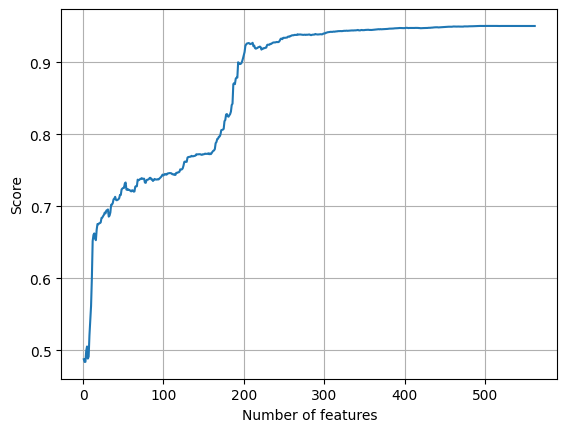

In [27]:




scores = rfecv.cv_results_['mean_test_score']

# Plotting the scores
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.plot(range(1, len(scores) + 1), scores)
plt.grid(True)
plt.show()




In [28]:
print(type(data_rfecv))

<class 'pandas.core.frame.DataFrame'>


In [7]:
from sklearn.model_selection import train_test_split

dataTrain, dataTest, yTrain, yTest = train_test_split(data_training, y, test_size=0.20, random_state=42)
# dataTrain_pca, dataTest_pca,_,_ = train_test_split(data_pca, y, test_size=0.20, random_state=42)
# dataTrain_rfecv, dataTest_rfecv, _,_ = train_test_split(data_rfecv, y, test_size=0.20, random_state=42)



In [9]:
fp_data_rfecv = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\rfecv stuff\\data_rfecv.csv"
fp_dataTest_rfecv = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\rfecv stuff\\dataTest_rfecv.csv"
fp_dataTrain_rfecv = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\rfecv stuff\\dataTrain_rfecv.csv"

fp_data_training = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\og data\\data_training.csv"
fp_dataTest = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\og data\\dataTest.csv"
fp_dataTrain = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\og data\\dataTrain.csv"

fp_data_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\data_pca.csv"
fp_dataTest_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\dataTest_pca.csv"
fp_dataTrain_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\dataTrain_pca.csv"


fp_y = "C:\\Users\\Lenovo\Desktop\\practice+projex\\jupyter notebooks\\HAR\\y.csv"
fp_yTest = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\yTest.csv"
fp_yTrain = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\yTrain.csv"

# data_rfecv.to_csv(fp_data_rfecv)
# dataTest_rfecv.to_csv(fp_dataTest_rfecv)
# dataTrain_rfecv.to_csv(fp_dataTrain_rfecv)

data_training.to_csv(fp_data_training)
dataTest.to_csv(fp_dataTest)
dataTrain.to_csv(fp_dataTrain)

# data_pca.to_csv(fp_data_pca)
# dataTest_pca.to_csv(fp_dataTest_pca)
# dataTrain_pca.to_csv(fp_dataTrain_pca)

y.to_csv(fp_y)
yTest.to_csv(fp_yTest)
yTrain.to_csv(fp_yTrain)



In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


def confusionMatrix(yTest, yhat):
  y_true = yTest
  y_pred = yhat

  # Generate confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  print("Confusion Matrix:")
  print(cm)


  # Calculate metrics
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("\nMetrics:")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")





#these are the results without dimensionality reduction using gwo algorithm

In [13]:
#!/usr/bin/env python
# Created by "Thieu" at 23:58, 14/12/2021 ----------%
#       Email: nguyenthieu2102@gmail.com            %
#       Github: https://github.com/thieu1995        %
# --------------------------------------------------%

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/


import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from mealpy.swarm_based import GWO
from mealpy.swarm_based import ACOR
from mealpy.swarm_based import PSO
from mealpy.evolutionary_based import FPA


class HybridMlp:

    def __init__(self, dataTrain, dataTest, yTrain, yTest, n_hidden_nodes, epoch, pop_size, algo):
        self.X_train, self.y_train, self.X_test, self.y_test =dataTrain, yTrain, dataTest, yTest
        self.n_hidden_nodes = n_hidden_nodes
        self.epoch = epoch
        self.pop_size = pop_size
        self.algo = algo


        self.n_inputs = self.X_train.shape[1]
        self.model, self.problem_size, self.n_dims, self.problem = None, None, None, None
        self.optimizer, self.solution, self.best_fit = None, None, None

    def create_network(self):
        # create model
        model = keras.Sequential()
        model.add(keras.layers.InputLayer(input_shape=(self.X_train.shape[1],)))

        for i in range(1,len(self.n_hidden_nodes)):
          model.add(keras.layers.Dense(n_hidden_nodes[i], activation = 'relu'))

        model.add(keras.layers.Dense(6, activation = 'softmax'))
        # Compile model
        # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model = model
        self.problem_size = self.n_dims = np.sum([np.size(w) for w in self.model.get_weights()])

    def create_problem(self):
        self.problem = {
            "fit_func": self.fitness_function,
            "lb": [-1, ] * self.n_dims,
            "ub": [1, ] * self.n_dims,
            "minmax": "max",
            "log_to": None,
            "save_population": False
        }

    def decode_solution(self, solution):
        # solution: is a vector.
        # solution = [w11, w21, w31, w12, w22, w32, b1, b2, wh11, wh21, wh12, wh22, wh13, wh23, bo1, bo2, bo3 ]
        # number of weights = n_inputs * n_hidden_nodes + n_hidden_nodes + n_hidden_nodes * n_outputs + n_outputs
        # we decode the solution into the neural network weights
        # we return the model with the new weight (weight from solution)
        weight_sizes = [(w.shape, np.size(w)) for w in self.model.get_weights()]
        # ( (3, 5),  15 )
        weights = []
        cut_point = 0
        for ws in weight_sizes:
            temp = np.reshape(solution[cut_point: cut_point + ws[1]], ws[0])
            # [0: 15], (3, 5),
            weights.append(temp)
            cut_point += ws[1]
        self.model.set_weights(weights)

    def prediction(self, solution, x_data):
        self.decode_solution(solution)
        return self.model.predict(x_data)

    def training(self):
        self.create_network()
        self.create_problem()
        if(self.algo == 'GWO'):
          self.optimizer = GWO.OriginalGWO(self.epoch, self.pop_size)
        elif(self.algo =='ACOR'):
          self.optimizer = ACOR.OriginalACOR(self.epoch, self.pop_size)
        elif(self.algo == 'PSO'):
          self.optimizer = PSO.OriginalPSO()
        else:
         self.optimizer = FPA.OriginalFPA(self.problem, self.epoch, self.pop_size)

        self.solution, self.best_fit = self.optimizer.solve(self.problem)

    def fitness_function(self, solution):  # Used in training process
        # Assumption that we have 3 layer , 1 input layer, 1 hidden layer and 1 output layer
        # number of nodes are 3, 2, 3
        # solution = [w11, w21, w31, w12, w22, w32, b1, b2, wh11, wh21, wh12, wh22, wh13, wh23, bo1, bo2, bo3 ]
        self.decode_solution(solution)
        yhat = self.model.predict(self.X_train)
        
        yhat = np.argmax(yhat, axis=-1).astype('int')
        acc = accuracy_score(self.y_train, yhat)
        return acc





n_hidden_nodes = [64,64,6]
epoch = 50
pop_size = 50

# define model
model = HybridMlp(dataTrain, dataTest, yTrain-1, yTest-1, n_hidden_nodes, epoch, pop_size, 'GWO')
# fit model
model.training()

# access to the best model - best set of weights - the final weights of neural network
# model.solution

# evaluate on test set
yhat = model.prediction(solution=model.solution, x_data=dataTest)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(yTest-1, yhat)
print('Accuracy: %.3f' % acc)
confusion_matrix(yTest, yhat)

 54/184 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step

c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/s

array([[  0,   0,   0,   0,   0,   0,   0],
       [191,  26,  29,   0,   1,   0,   0],
       [ 25, 153,  20,   0,   2,   0,   0],
       [ 30,  24, 152,   0,   0,   0,   0],
       [  0,   1,   0, 190,  71,   0,   0],
       [  0,   1,   0,  59, 216,   0,   0],
       [  4,   3,   1, 208,  64,   0,   0]], dtype=int64)

In [33]:
n_hidden_nodes = [64,64,64,6]
epoch = 50
pop_size = 50

# define model
model = HybridMlp(dataTrain, dataTest, yTrain, yTest, n_hidden_nodes, epoch, pop_size, 'GWO')
# fit model
model.training()

# access to the best model - best set of weights - the final weights of neural network
# model.solution

# evaluate on test set
yhat1 = model.prediction(solution=model.solution, x_data=dataTest)
yhat1 = np.argmax(yhat1, axis=-1).astype('int')
acc = accuracy_score(yTest, yhat1)
print('Accuracy: %.3f' % acc)
confusion_matrix(yTest, yhat1)


#The same results but for 3 hidden layers

c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[211,  17,  19,   0,   0,   0],
       [ 12, 158,  23,   2,   5,   0],
       [ 29,  47, 130,   0,   0,   0],
       [  0,   3,   0, 159, 100,   0],
       [  0,   1,   0,  47, 228,   0],
       [  1,  11,   1, 170,  97,   0]], dtype=int64)

#RESULTS FOR ORIGINAL DATASET WITH 2 HIDDEN LAYERS AND USING GWO ALGORITHM

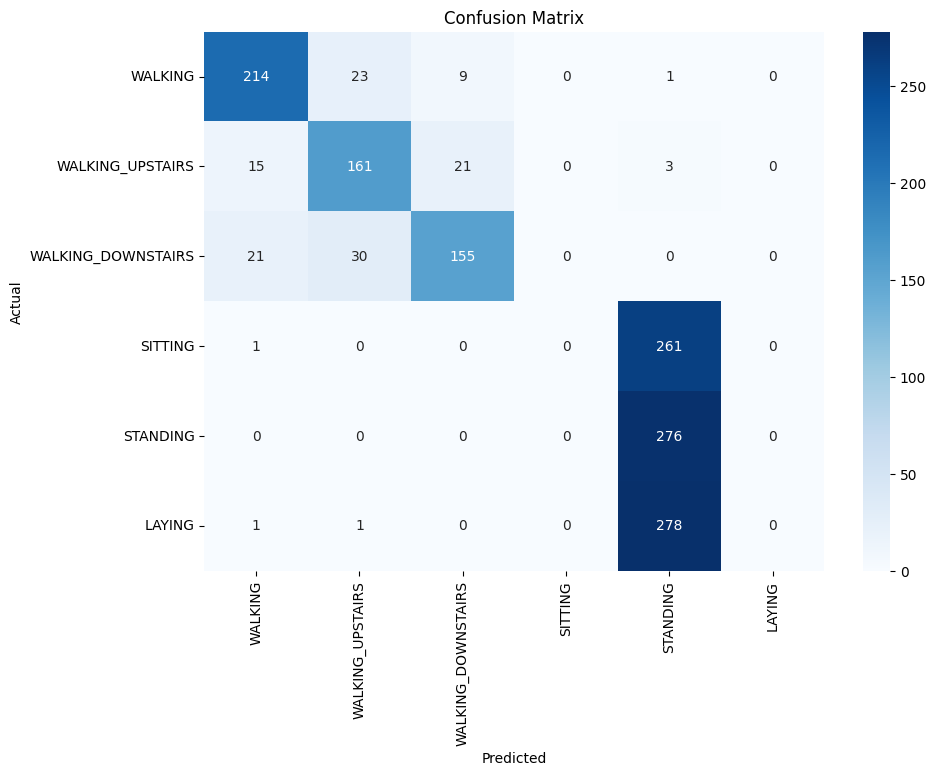

                    precision    recall  f1-score   support

           WALKING    0.84921   0.86640   0.85772       247
  WALKING_UPSTAIRS    0.74884   0.80500   0.77590       200
WALKING_DOWNSTAIRS    0.83784   0.75243   0.79284       206
           SITTING    0.00000   0.00000   0.00000       262
          STANDING    0.33700   1.00000   0.50411       276
            LAYING    0.00000   0.00000   0.00000       280

          accuracy                        0.54793      1471
         macro avg    0.46215   0.57064   0.48843      1471
      weighted avg    0.42497   0.54793   0.45513      1471

Accuracy: 0.54793


c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Given confusion matrix as a numpy array
cm = np.array([[214,  23,   9,   0,   1,   0],
               [ 15, 161,  21,   0,   3,   0],
               [ 21,  30, 155,   0,   0,   0],
               [  1,   0,   0,   0, 261,   0],
               [  0,   0,   0,   0, 276,   0],
               [  1,   1,   0,   0, 278,   0]])

# Optional: Specify labels for the classes
def results(cm):
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    import numpy as np
    from sklearn.metrics import classification_report

    # Given confusion matrix


    # True labels and predicted labels
    true_labels = []
    pred_labels = []

    for i in range(len(cm)):
        for j in range(len(cm[i])):
            true_labels.extend([i] * cm[i][j])
            pred_labels.extend([j] * cm[i][j])

    # Generate classification report
    accuracy = accuracy_score(true_labels, pred_labels)


    report = classification_report(true_labels, pred_labels, target_names=labels, digits=5)
    print(report)
    print(f"Accuracy: {accuracy:.5f}")
   
    
results(cm)



#RESULTS FOR ORIGINAL DATASET WITH 3 HIDDEN LAYERS USING GWO ALGORITHM

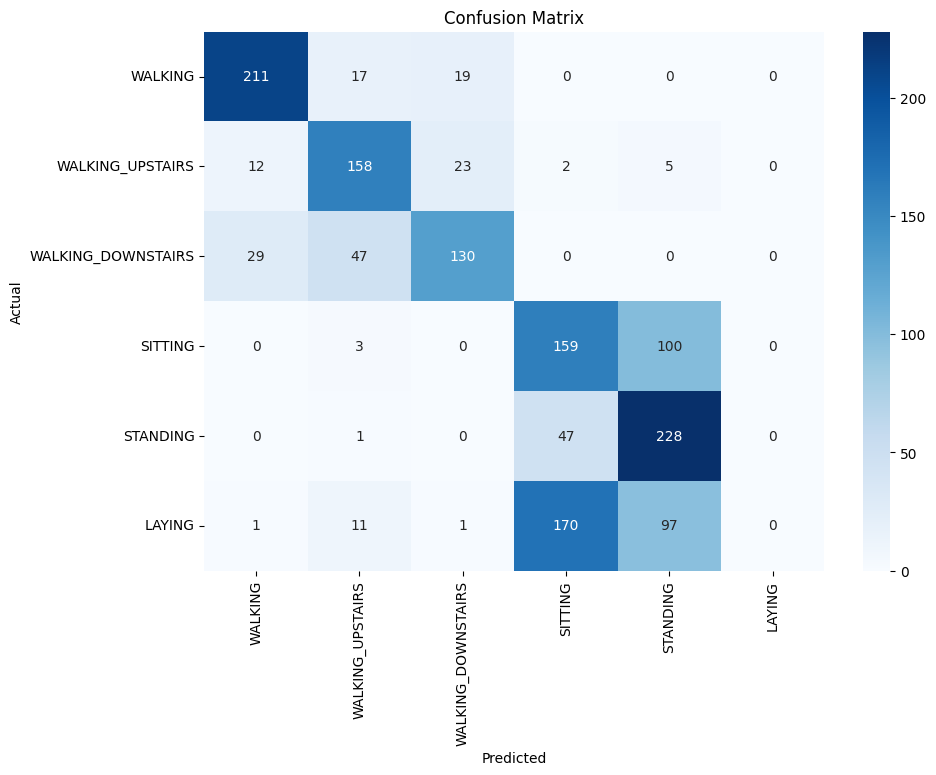

                    precision    recall  f1-score   support

           WALKING    0.83399   0.85425   0.84400       247
  WALKING_UPSTAIRS    0.66667   0.79000   0.72311       200
WALKING_DOWNSTAIRS    0.75145   0.63107   0.68602       206
           SITTING    0.42063   0.60687   0.49688       262
          STANDING    0.53023   0.82609   0.64589       276
            LAYING    0.00000   0.00000   0.00000       280

          accuracy                        0.60231      1471
         macro avg    0.53383   0.61805   0.56598      1471
      weighted avg    0.51032   0.60231   0.54579      1471

Accuracy: 0.60231


c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [24]:
cm = np.array([[211,  17,  19,   0,   0,   0],
       [ 12, 158,  23,   2,   5,   0],
       [ 29,  47, 130,   0,   0,   0],
       [  0,   3,   0, 159, 100,   0],
       [  0,   1,   0,  47, 228,   0],
       [  1,  11,   1, 170,  97,   0]])
results(cm)

In [7]:
import os
os.getcwd()

'c:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\GWO'

In [8]:
os.listdir()

['GWO_OG.ipynb', 'GWO_PCA.ipynb', 'GWO_RFECv.ipynb', 'results.ipynb']